# Regresion Lineal y Descenso del Gradiente

El objetivo es:

*   Implementar grid search, gradient descent y stochastic gradient descent
*   Aprender a visualizer tus resultados
*   Identificar ventajas y desventajas de estos algortimos
*   Analizar el efecto de MSE      

$\textbf{A}$) ¿Qué representa cada columna de $\tilde{X}$ ̃?
- La primera columna representa un vector de unos 
- La segunda columna representa los datos de altura

$\textbf{B}$)¿Qué representa cada fila de  $\tilde{X}$ ?
- Cada fila de x representa el dato 1 para realizar la operación entre matrices y el valor de las alturas de todas las muestras o datos

$\textbf{C}$) ¿Por qué tenemos unos en $\tilde{X}$ ̃?
- El objetivo de la columna de unos es que al momento de realizar la operación entre matrices no se pierda el valor de $W_{0}$ y  pueda quedar de la forma  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$F= W_{0}+ W_{1}*X_{1}$ y de esta manera se pueda representar los datos de forma vectorial. 

$\textbf{E}$) Si tenemos las alturas y pesos de 3 personas, ¿cúal sería el tamaño de $\textbf{y}$ y $\tilde{X}$ ? ¿Qué
representaría   $\tilde{X}_{32}$ ?
- Y = 212.74
- X = 74.11
- Este dato representaría la altura de la tercera persona 

$\textbf{E}$) En lib.py, se ha proporcionado código para formar arrays para $\textbf{y}$ y $\tilde{X}$. Revisa el código y
asegúrate de entender cómo están construidos.
- En lin.py inicial mente contamos en la importacion de la librería numpy para operaciones matemáticas y listas
- posteriormente se crean 3 funciones:
    - load data: encargada de cargar los datos, ordenarlos y convertirlos en las unidades adecuadas y retornar un subconjunto de 50 muestra si la sub_sample es verdadera. 
    - standarizer(X): que aplica la función de estandarización calculado la media y la desviación estándar, devolviendo así los datos estandarizados. 
    - build_model_data(height, weight): prepara los datos para poder aplicar una regresión lineal agregando una columna de unos a x de alturas.





# Data

In [22]:
from lib import *

height, weight, gender = load_data(sub_sample=False)
X, mu_X, sigma_X = standarizer(height)
y, X_ = build_model_data(X, weight)

$\textbf{F}$) Verifica si los tamaños de las variables tienen sentido (usa la función shape).
- Al verificar el tamaño de las variables con la función shape se puede llegar a la conclusión de que los datos están correctos gracias a que tienen las mismas dimensiones. 

In [23]:
y.shape, X_.shape

((10000,), (10000, 2))

# 1. Calcule la funcion costo

Complete las funciones faltantes, verifique con el ejemplo de la clase

In [24]:
import numpy as np

def loss_function(X_, y, w, option=1):
 
  """
    Args:
      X_: matrix numpy de la forma (N,2)
      y: vector numpy de la forma (N,)
      w: vector de la forma (2,)
      option: 1 for mse
              0 for mae

    Return:
      El valor de la perdida correspondiente a el parametros de entrada w
  """
  errors =np.dot(X_, w)
  n = len(y)
  if option == 0:
    loss = (1/(n))*np.sum(np.abs(y-errors))
    return loss
  elif option == 1:
    loss = (1/(2*n))*np.sum((y-errors)**2)
    return loss
  



Ahora si todo esta bien, deberiamos obtener

In [25]:
xx = np.array([[1 ,1], [1, 2]])
yy = np.array([1, 2])
ww = np.array([0, 1])

loss_function(xx, yy, ww, 1)


0.0

# 2. Grid Search


In [26]:
def grid_search(X_, y, grid_w0, grid_w1, option):
  """
    Este algoritmo realiza la busqueda creando una cuadricula
    Args:
      X_ : numpy de la forma = (N,2)
      y  : numpy de forma =  (N,)
      grid_w0: numpy de la forma = (num_pts_w0,) .Array 1D que contiene num_pts_w0 valores del parametro w0 a ser probados en la cuadricula
      grid_w1: numpy de la forma = (num_pts_w1,) .Array 1D que contiene num_pts_w1 valores del parametro w1 a ser probados en la cuadricula
      option: scalar value = 1 para MSE y 0 para MAE
    Return:
      losses: numpy de la forma = (num_pts_w0, num_pts_w1). Array 2D que contiene los valores de la funcion de perdidad para cada una de las
              combinaciones de w0 y w1
  """
    
  losses_grid = np.zeros((len(grid_w0), len(grid_w1)))
  for i, w0 in enumerate(grid_w0):
    for j, w1 in enumerate(grid_w1):
      # Crear un array w con w0 y w1
      w = np.array([w0,w1])
      # Calcula la pérdida según la opción especificada (MSE o MAE)
      w = np.reshape(w,(len(w),1))
      y = np.reshape(y,(len(y),1))
      loss = loss_function(X_,y,w, option = option)
      # Almacena la pérdida en la posición correspondiente de la cuadrícula
      losses_grid[i, j] = loss
  return losses_grid



Si, todo va bien podremos usarla

In [27]:
def gen_w(start, stop, n_intervals):
  """ Generamos la Grilla """
  grid_w0 = np.linspace(start[0], stop[0], n_intervals)
  grid_w1 = np.linspace(start[1], stop[1], n_intervals)
  return grid_w0, grid_w1

def get_best_param(w0, w1, losses_grid):
  """ Obtenemos los mejores w* a partir del resultados obtenidos con la función de perdida en grid search
  """
  min_row, min_col = np.unravel_index(losses_grid.argmin(), losses_grid.shape)
  return losses_grid[min_row, min_col], w0[min_row], w1[min_col]

In [28]:
import datetime

# Emepzamos generando la malla
start = [-100, -150]
stop = [200, 150]
n_intervals = 10

grid_w0, grid_w1 = gen_w(start, stop, n_intervals)

# iniciamos la busqueda en la malla
start_time = datetime.datetime.now()
grid_losses = grid_search(X_,y, grid_w0, grid_w1, 1)

# Escogemos la mejor combinación
loss_min, w0_best, w1_best = get_best_param(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

print(f"Grid Search: loss* = {loss_min}, w0* = {w0_best}, w1* = {w1_best}, execution time = {execution_time} seconds")

Grid Search: loss* = 42.42448314678248, w0* = 66.66666666666669, w1* = 16.666666666666686, execution time = 0.044635 seconds


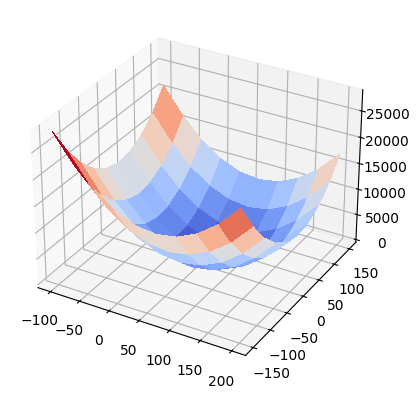

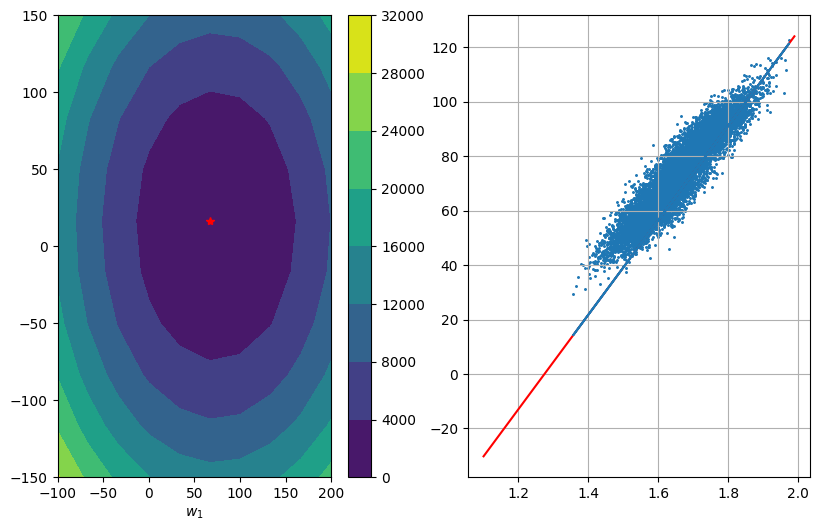

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm

def predictions(w0, w1, mu, sigma):
  """ Creemos el modelo de la regresion lineal f(x)"""
  x = np.arange(1.1, 2, 0.01)
  x_normalized = (x - mu)/sigma
  f = w0 + w1*x_normalized
  return x, f

# Grafiquemos los resultados 3D
w0, w1 = np.meshgrid(grid_w0, grid_w1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w0, w1, grid_losses, cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig = plt.figure()

# plt contour
ax1 = fig.add_subplot(1,3,1)
contour = ax1.contourf(w0, w1, grid_losses.T)
fig.colorbar(contour, ax=ax1)
ax1.set_xlabel(r"$w_0$")
ax1.set_xlabel(r"$w_1$")
# ubiacion al minimo  - star
ax1.plot(w0_best, w1_best, marker = '*', color="r")

# plt model
ax2 = fig.add_subplot(1,3,2)
ax2.scatter( height, weight, marker='.', s=5)
ax2.grid()

x, f = predictions(w0_best, w1_best, mu_X, sigma_X)   # Modelos f(x) = w0 +w1*x
ax2 = fig.get_axes()[2]
ax2.plot(x, f, color='r')
ax2.plot(height, w0_best + w1_best*X)                 # Desde los datos
fig.set_size_inches(15, 6)



# 3. Gradient Descent

In [30]:
def gd(X_, w, y):
    """ 
    Calculo del gradiente en w
    Args:
        X_: numpy de la forma (N, 2)
        w : numpy de la forma (2,). Vector de parámetros del modelo
        y : numpy de la forma (N,)
    Return:
        Un vector numpy de la forma (2,), que tiene el gradiente de la función de pérdida en w
    """
    n = len(y)
    errors = np.dot(X_, w)
    gradient = (1/n)*np.dot(X_.T, (errors - y))
    return gradient

Si esta bien, debe darnos lo siguiente

In [19]:
xx = np.array([[1 ,1], [1, 2]])
yy = np.array([1, 2])
ww = np.array([1, 1])

gd(xx, ww, yy)

array([1. , 1.5])

Ahora, iteremos para encontrar el mejor w*

In [ ]:
def gd_algorithm(X_, y, w_initial, max_iters, gamma):
  """
    Algoritmo GD
    Args:
      X_: numpy de la forma (N,2)
      y : numpy de la forma (N,)
      w_inicial: numpy de la forma (2,). Inicializacion del modelo
      max_iters: un escalar indicando el maximo numero de iteraciones
      gamma: escalar indicando el paso o learning rate

    Returns:
      losses: lsita de longuitud max_iters con loas valores de las perdidad para cada iteracion de GD
      wt: una lista de longuitud max_iters con los parametros del modelo como numpy de la forma (2,) apra cada iteracion
  """
  wt = [w_initial]
  losses = []
  w = w_initial

  for n_iter in range(max_iters):
    # Agrega el codigo apara calcular el gradiente y loss
    # ...
    
    # Agrega el coldigo para actualizar w
    # ...
    loss = loss_function(X_, y, w)
    gradient = gd(X_, w, y)
    w = w - gamma*gradient
  
    # Guardemos w y loss
    wt.append(w)
    losses.append(loss)
    print(" GD iter {i}/{ti}: loss={l}, w0={w0}, w1={w1}".format( i=n_iter,
          ti=max_iters-1, l=loss, w0=w[0], w1=w[1]))

  return losses, wt

Deberiamos obtener

In [21]:
max_iters = 50
gamma = 0.7

w_initial = np.array([0, 0])

# Iniciamos
start_time = datetime.datetime.now()
gd_l, gd_w = gd_algorithm(X_, y, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Vamos los resultados
ex_time = (end_time - start_time).total_seconds()
print(f"Tiempo de ejecucion del Algortimo GD: {ex_time:.3f} segundos")

 GD iter 0/49: loss=2792.2367127591674, w0=51.30574540147363, w1=9.435798704492282
 GD iter 1/49: loss=265.3024621089601, w0=66.69746902191572, w1=12.266538315840002
 GD iter 2/49: loss=37.87837955044118, w0=71.31498610804834, w1=13.11576019924433
 GD iter 3/49: loss=17.41021212017447, w0=72.70024123388814, w1=13.370526764265632
 GD iter 4/49: loss=15.568077051450455, w0=73.11581777164007, w1=13.446956733772023
 GD iter 5/49: loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
 GD iter 6/49: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
 GD iter 7/49: loss=15.386020684743531, w0=73.28911318788263, w1=13.478828031056189
 GD iter 8/49: loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
 GD iter 9/49: loss=15.385888944638307, w0=73.29348920882515, w1=13.47963283863509
 GD iter 10/49: loss=15.385887965652202, w0=73.29379216412117, w1=13.479688556082861
 GD iter 11/49: loss=15.385887877543452, w0=73.29388305070998, w1=13.47970527131719